In [25]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [71]:
Ns = [100, 250, 500, 1000]
alphas = [1, 0.1, 2, 5]
iterations = 1000
    
def generate_times(alpha, N):
    window_times = np.random.exponential(alpha, N)
    window_times.sort()
    return window_times

В наших экмпериментах не будем учитывать людей, которые первыми встали в окошко.
Также в силу особенностей реализации библиотеки numpy будем использовать следующее определение экспоненциального распределения: $Exp(\alpha) \sim \alpha Exp(1)$ 

## Задание A

В данном эксперименте считаем среднее время ожидания для i-го человека в очереди

In [40]:
def experiments_A(alpha, N, iterations) -> np.array:
    result = np.zeros(N)
    for _ in range(iterations):
        result += generate_times(alpha, N)
    return result / iterations

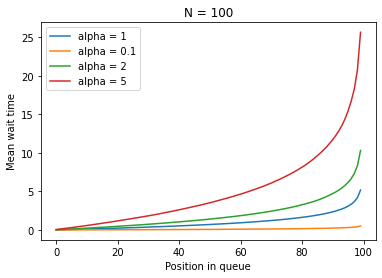

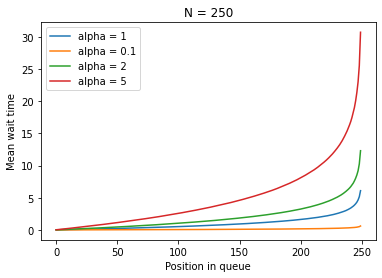

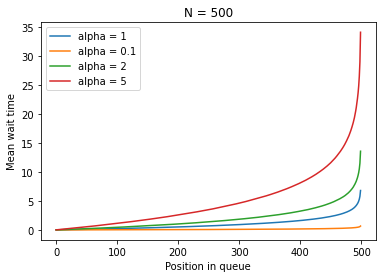

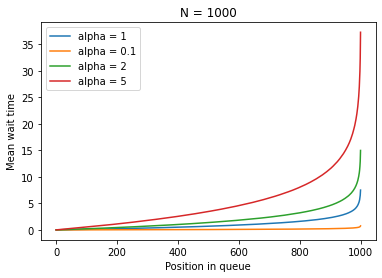

In [74]:
for n in Ns:
    plots = []
    xs = np.arange(n)
    legend = []
    for a in alphas:
        plt.plot(xs, experiments_A(a, n, iterations))
        legend.append(f"alpha = {a}")
    plt.legend(legend)
    plt.xlabel("Position in queue")
    plt.ylabel("Mean wait time")
    plt.title(f"N = {n}")
    plt.show()

Оценим теперь с теоретической точки зрения среднее время ожидания k-го человека в очереди, используя знания с практики о том, что $X_{(k + 1)} - X_{k} \sim Exp(\frac{\alpha}{n - k}))$. Для удобства положим $X_{(0)} = 0$

$EX_{(k)} = \sum_{i = 0}^{k - 1}E(X_{(i + 1)} - EX_{(i)}) = \sum_{i = 0}^{k - 1}\frac{\alpha}{n - i}$

Посмотрим теперь на погрешность наших экспериментов относительно вычеслнного матожидания.

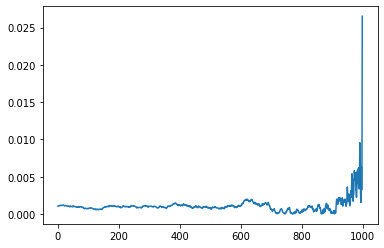

In [48]:
def plot_error(alpha, N):
    xs = np.arange(N)
    y1 = experiments_A(alpha, N, iterations)
    y2 = np.zeros(N)
    for i in range(1, N):
        y2[i] = y2[i - 1] + alpha / (n - i)
    plt.plot(xs, np.abs(y1 - y2))
    plt.show()

plot_error(alpha=1, N=1000)

## Задание B

Также считаем среднее время ожидания i-го человека в очереди.

Только пусть у нас k людей в очереди и N окошек. В эксперименте возьмём k = N * 3 

In [42]:
def experiments_B(alpha, N, k, iterations):
    result = np.zeros(k)
    for _ in range(iterations):
        times = list(generate_times(alpha, N))
        heapq.heapify(times)
        for i in range(k):
            cur_time = heapq.heappop(times)
            result[i] += cur_time
            heapq.heappush(times, cur_time + np.random.exponential(alpha))
    return result / iterations       

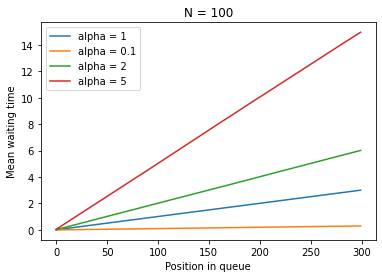

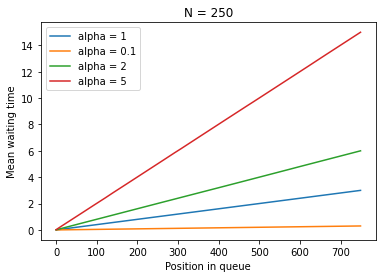

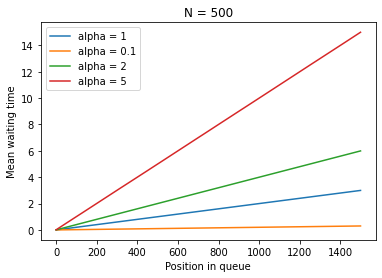

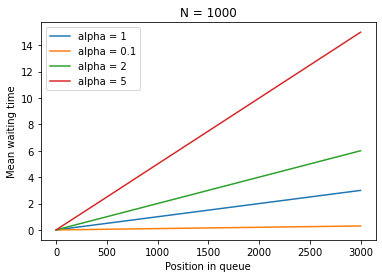

In [75]:
for n in Ns:
    plots = []
    k = n * 3
    xs = np.arange(k)
    legend = []
    for a in alphas:
        plt.plot(xs, experiments_B(a, n, k, iterations))
        legend.append(f"alpha = {a}")
    plt.legend(legend)
    plt.xlabel("Position in queue")
    plt.ylabel("Mean waiting time")
    plt.title(f"N = {n}")
    plt.show()

Как можно увидеть с графиков, среднее время ожидания k-го человека можно попробовать вычислять по формуле $\alpha \frac{k}{N}$. Проверим погрешность.

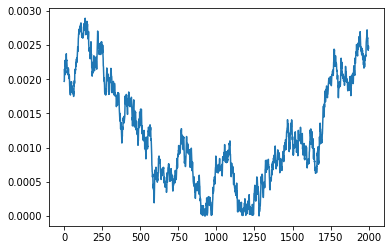

In [76]:
def plot_error(alpha, N, k):
    y1 = experiments_B(alpha, N, k, iterations)
    y2 = np.array([(alpha * i / N) for i in range(k)])
    plt.plot(np.arange(k), np.abs(y1 - y2))
    plt.show()
    
plot_error(alpha=1, N=500, k=2000)